## 背景
- #### 简介
      泰坦尼克号是当时世界上体积最庞大、内部设施最豪华的客运轮船，有“永不沉没”的美誉 。然而讽刺的是，在她的处女航中，泰坦尼克号便遭厄运——她从英国南安普敦出发，途经法国瑟堡-奥克特维尔以及爱尔兰昆士敦，驶向美国纽约，船上时间1912年4月14日23时40分左右，泰坦尼克号与一座冰山相撞，造成右舷船艏至船中部破裂，五座水密舱进水。次日凌晨2时20分左右，泰坦尼克船体断裂成两截后沉入大西洋底3700米处。2224名船员及乘客中，逾1500人丧生，其中仅333具罹难者遗体被寻回。泰坦尼克号沉没事故为和平时期死伤人数最惨重的海难之一，其残骸直至1985年才被再度发现，目前受到联合国教育、科学及文化组织的保护。
- #### 数据集来源
样本数据来自Kaggle，包括泰坦尼克号上 2224 名乘客和船员中 891 名的人口学数据和乘客基本信息。你可以右键点击 [该链接](https://github.com/ShiChJ/DAND-Basic-Materials/blob/master/P2/Project_Files/titanic-data.csv) 选择“另存为”下载。你也可以在 Kaggle 网站上查看这个数据集的详细描述。这个数据集就是来自 Kaggle。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
user_data_df = pd.read_csv('titanic-data.csv')
# 使用info() 获取基本数据信息
user_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### 1- Question(提出问题)
- #### 理解列名： PassengerId => 乘客ID，不可影响生还，忽略
    Survived => 获救情况（1为获救，0为未获救）<br>
    Pclass => 乘客等级/船舱等级(1/2/3等舱位),这个较可能影响获救，权贵容易特殊照顾<br>
    Name => 乘客姓名，感觉不能影响获救，忽略<br>
    Sex => 性别，女性易受保护，有可能<br>
    Age => 年龄，有可能<br>
    SibSp => 堂兄弟/妹个数，有可能<br>
    Parch => 父母与小孩个数，有可能<br>
    Ticket => 船票信息，票编号 感觉不可能<br>
    Fare => 票价，有可能，高价可代表着权贵<br>
    Cabin => 客舱，有可能，因为可能距离救生艇的距离近容易获救<br>
    Embarked => 登船港口，有可能，比如：发达的港口代表着地位不一样<br>
    
- #### 提出问题：
    舱室等级 对存活率的影响<br>
    性别 对存活率的影响<br>
    年龄 对存活率的影响<br>
    舱室等级与性别的综合因素 对存活率的影响<br>



### 2- Wrangle(数据整理)
- Cabin，缺失太多，对其不做分析，这里不做清理
- Embarked，本次分析不针对，这里不做清理。（若分析，可用众数填充）
- Age，为了反映真实数据，对Age信息调查时，清理掉age信息为空的数据，所以age信息调果的实际数据仅为714

In [4]:
# Age值为NaN时 去除掉
user_data_df.dropna(subset = ['Age'], inplace = True)
user_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Cabin          185 non-null object
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


### 3- Explore(数据探索)

In [5]:
#总体生还率
user_data_origin = pd.read_csv('titanic-data.csv')
user_data_origin['Survived'].mean()

0.3838383838383838

总体生还率0.38

#### 3.1- 探索舱室等级对存活率的影响

Pclass
1    0.655914
2    0.479769
3    0.239437
Name: Survived, dtype: float64


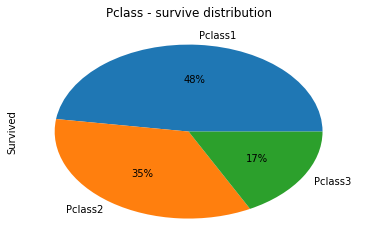

In [6]:
#不同等级仓位生还率
survived_pclass = user_data_df.groupby('Pclass')['Survived'].mean()
print survived_pclass
survived_pclass.plot(kind='pie',autopct='%.0f%%',labels=['Pclass1','Pclass2','Pclass3'])
plt.title(u"Pclass - survive distribution")
plt.show()

由图可见：等级越高，生还率越高

#### 3.2- 探索性别对存活率的影响

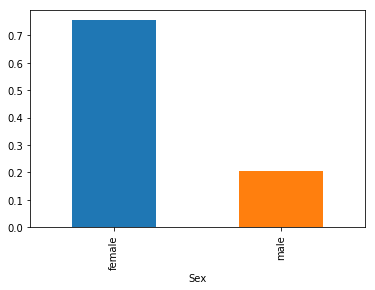

In [8]:
user_data_df.groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.show()

由图可见：女性生还机率明显大于男性

#### 3.3- 探索年龄对存活率的影响

Text(0,0.5,'density')

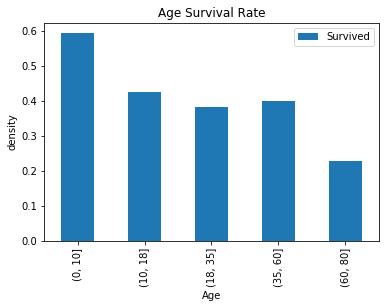

In [10]:
#不同年龄段生还机率
survived_age = user_data_df[user_data_df.Survived == 1]['Age'].dropna()

bins=[0, 10, 18, 35, 60 , 80]

# 根据给定的区间进行分组
user_data_df['AgeLevel'] = pd.cut(user_data_df['Age'], bins)

factor_df = pd.concat([user_data_df['Survived'], user_data_df['AgeLevel']], axis = 1)

df_grouped = factor_df.groupby('AgeLevel')
# 统计每组生存者的总数
grouped_survied_factors = df_grouped.sum()
# 统计分组总有人数
grouped_each_factor_counts = df_grouped.count()

# 计算存活率
survived_rate = grouped_survied_factors / grouped_each_factor_counts

# 绘制直方图与饼图
survived_rate.plot(kind = 'bar')

plt.title('Age Survival Rate')
plt.xlabel('Age')
plt.ylabel('density')




由图可见：整体随着年龄变大，获救率降低

#### 3.4- 舱室等级与性别的综合因素对存活率的影响

Pclass  Sex   
1       female    0.964706
        male      0.396040
2       female    0.918919
        male      0.151515
3       female    0.460784
        male      0.150198
Name: Survived, dtype: float64


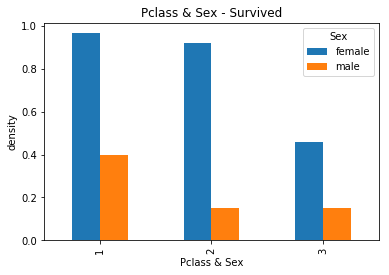

In [11]:
series_grouped_factor = user_data_df.groupby(['Pclass', 'Sex'])['Survived']
    
grouped_survied_factors = series_grouped_factor.sum()
grouped_each_factor_counts = series_grouped_factor.count()

survived_rate = grouped_survied_factors / grouped_each_factor_counts

print survived_rate
# 绘制直方图
survived_rate.unstack().plot(kind = 'bar')

plt.title('Pclass & Sex - Survived')
plt.xlabel('Pclass & Sex')
plt.ylabel('density')

plt.show()

由图可见：等级高、性别女的，存活率偏高

### 4- Draw Conclusions(得出结论)
1、整体生还率，0.38%，太低了<br>
2、等级越高，生还率越高<br>
3、女性明显高于男性<br>
4、整体随着年龄变大，生还率在降低<br>
5、船舱等级不同，生还率差别很大，1等舱>2等舱>3等舱<br>

### 5-Communicate(交流)
1、生还率才0.38%，当时没能预判这场事故，导致后果很严重，希望以后每条船都拥有足够精确的事故预判，阻止灾难发生。<br>
2、分析过程中，去掉了age信息为空的数据，实际数据为714，这个可能会对真实结果集产生影响。<br>
3、男性，明明是群体中最具有强壮的体魄，又有相对更丰富的生存经验，反而在这场事故中就成了生存机率最低的，肯定不少没生还的男士，是主动让出位置给其他弱势群体，他们的绅士风度是值得歌颂的<br>
4、还有另一些因素可考虑，可能比较明显，比如：同一家人出现在船上的，家庭一员其中很可能有愿意为其它家庭让出宝贵位置的。<br>
5、该样本中没有反应出所有人员是船员还是乘客，所以无法判断是否船员有更大的生还机率，这个是很重要的线索，待验证。<br>
6、此样本数据只是2241中的891个，虽然不是全部数据，但样本量己达到总量的40%,但可以反应一个较大概率的可能性。<br>


### 参考：
https://github.com/nd009/Conda-Environment-Configuration
https://review.udacity.com/#!/reviews/1304490
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html#pandas.DataFrame.plot
